<a href="https://colab.research.google.com/github/Nongbon/INTERNSHIP_NARIT/blob/main/M_phot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math 
import seaborn as sns
from random import seed


In [15]:
!wget https://raw.githubusercontent.com/Nongbon/INTERNSHIP_NARIT/main/data_phot.csv

--2021-05-28 08:19:41--  https://raw.githubusercontent.com/Nongbon/INTERNSHIP_NARIT/main/data_phot.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24156 (24K) [text/plain]
Saving to: ‘data_phot.csv.1’

data_phot.csv.1     100%[===================>]  23.59K  --.-KB/s    in 0.004s  

2021-05-28 08:19:41 (5.60 MB/s) - ‘data_phot.csv.1’ saved [24156/24156]



In [16]:
data_phot = pd.read_csv("data_phot.csv").drop(['E(B-V)'],axis=1)
data_phot

,KIC,d_est,d_lo,d_hi,A_r,A_J,A_K,r,J,K,New_r
0,1433760,192.958633,190.228856,195.766455,0.053545,0.014017,0.003472,16.982,13.884,13.128,16.624
1,2831828,106.524990,105.009638,108.083913,0.019206,0.005028,0.001245,18.779,14.845,14.062,18.810
2,2971472,40.706364,40.647560,40.765336,0.009219,0.002413,0.000598,14.948,10.889,10.028,14.969
3,2983661,148.671765,147.470011,149.892912,0.042638,0.011162,0.002765,16.738,13.490,12.695,16.319
4,3101838,201.853369,199.615989,204.140557,0.066318,0.017361,0.004300,16.470,13.252,12.375,16.025
...,...,...,...,...,...,...,...,...,...,...,...
203,12508767,75.955190,75.746448,76.165065,0.019169,0.005018,0.001243,15.216,11.977,11.166,14.769
204,12645891,199.483571,195.889349,203.209705,0.032299,0.008455,0.002094,17.989,14.318,13.638,17.990
205,12735831,68.307667,68.080168,68.536664,0.013548,0.003546,0.000878,16.321,12.940,12.163,16.329
206,12784248,79.894261,79.242447,80.556692,0.020554,0.005381,0.001333,18.788,14.281,13.403,18.772


In [17]:
data_phot['d_hi-d'] = data_phot.d_hi - data_phot.d_est
data_phot['d_lo-d'] = data_phot.d_lo - data_phot.d_est
data_phot['sd_d'] = (data_phot['d_hi-d'] + data_phot['d_lo-d']) / 2 
data_phot

,KIC,d_est,d_lo,d_hi,A_r,A_J,A_K,r,J,K,New_r,d_hi-d,d_lo-d,sd_d
0,1433760,192.958633,190.228856,195.766455,0.053545,0.014017,0.003472,16.982,13.884,13.128,16.624,2.807822,-2.729777,0.039023
1,2831828,106.524990,105.009638,108.083913,0.019206,0.005028,0.001245,18.779,14.845,14.062,18.810,1.558923,-1.515352,0.021786
2,2971472,40.706364,40.647560,40.765336,0.009219,0.002413,0.000598,14.948,10.889,10.028,14.969,0.058972,-0.058804,0.000084
3,2983661,148.671765,147.470011,149.892912,0.042638,0.011162,0.002765,16.738,13.490,12.695,16.319,1.221147,-1.201754,0.009696
4,3101838,201.853369,199.615989,204.140557,0.066318,0.017361,0.004300,16.470,13.252,12.375,16.025,2.287188,-2.237380,0.024904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,12508767,75.955190,75.746448,76.165065,0.019169,0.005018,0.001243,15.216,11.977,11.166,14.769,0.209875,-0.208742,0.000567
204,12645891,199.483571,195.889349,203.209705,0.032299,0.008455,0.002094,17.989,14.318,13.638,17.990,3.726134,-3.594222,0.065956
205,12735831,68.307667,68.080168,68.536664,0.013548,0.003546,0.000878,16.321,12.940,12.163,16.329,0.228997,-0.227499,0.000749
206,12784248,79.894261,79.242447,80.556692,0.020554,0.005381,0.001333,18.788,14.281,13.403,18.772,0.662431,-0.651813,0.005309


In [21]:
#GENERATE
data_sample_d = []
data_sample_d = pd.DataFrame(data_sample_d)

for i in range(208) :
  data_sample_d[i] = np.random.normal(data_phot.d_est[i] , data_phot.sd_d[i], 10**4) 
  

In [22]:
data_sample_d

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207
0,192.978713,106.484658,40.706192,148.659569,201.835135,111.973658,144.115126,45.524125,172.651983,23.997070,110.173119,178.818612,202.387400,139.243048,163.736628,83.718891,27.729779,45.275931,100.477335,41.655515,92.930837,194.419847,111.370475,152.288278,53.109860,157.365088,154.254891,66.221654,148.795620,474.044492,134.522985,113.835666,193.141875,98.348530,109.548996,91.629663,78.447158,261.384163,71.055401,124.083928,...,315.258311,97.843355,92.824845,244.484174,109.751524,132.839691,144.063464,231.273758,144.088388,132.850879,51.680948,188.003871,317.196378,60.038055,85.439009,157.836016,134.859038,192.381114,97.142325,173.528185,58.284394,183.709737,190.339303,107.880500,101.433046,64.387362,219.822751,159.124883,217.562210,141.891698,301.465180,121.683824,162.897067,248.882048,80.202022,75.954806,199.330180,68.308219,79.894926,126.626703
1,192.983833,106.517098,40.706166,148.673471,201.878764,111.968889,144.102819,45.524070,172.687458,23.997029,110.170193,178.866332,202.408418,139.248272,163.705878,83.718482,27.729904,45.275751,100.477107,41.655633,92.932390,194.480624,111.370380,152.175179,53.110123,157.395310,154.257565,66.221449,148.698835,474.249442,134.744442,113.803795,193.516154,98.348488,109.538440,91.630514,78.447062,261.363779,71.056978,124.091120,...,313.462299,97.839834,92.826772,244.447860,109.745189,132.836997,144.050729,231.186356,144.085329,132.843980,51.680247,187.992873,316.771859,60.037996,85.436765,157.834628,134.799115,192.375088,97.105428,173.530438,58.283959,183.769755,190.364400,107.880076,101.390621,64.076045,219.858252,159.086801,217.513798,141.890592,301.540641,121.692543,162.913441,249.054115,80.200518,75.955841,199.665381,68.307360,79.898230,126.622208
2,192.977966,106.504633,40.706258,148.666261,201.880510,111.971195,144.096010,45.524049,172.683468,23.997038,110.165488,178.818680,202.402399,139.257380,163.752822,83.717026,27.730219,45.275910,100.474740,41.655644,92.931461,194.477056,111.369391,152.378554,53.109872,157.376534,154.271215,66.222207,148.834843,474.127586,134.938551,113.816877,192.979131,98.352282,109.552819,91.609451,78.446861,261.348666,71.058669,124.089566,...,316.315984,97.832322,92.835656,244.510246,109.750274,132.843113,144.043461,231.239752,144.081552,132.844698,51.680676,187.980365,317.110752,60.037182,85.439067,157.814468,134.841357,192.343884,97.130547,173.531008,58.283917,183.705661,190.359135,107.879797,101.459314,64.572374,219.826955,159.084638,217.520300,141.892561,301.693271,121.720146,162.885949,248.844334,80.201162,75.955977,199.549899,68.307855,79.895245,126.629299
3,192.878104,106.540843,40.706252,148.676101,201.828843,111.973379,144.097491,45.524255,172.625832,23.997031,110.171009,178.807100,202.345796,139.255090,163.749813,83.715865,27.729780,45.275835,100.477883,41.655437,92.934231,194.478816,111.367363,152.269616,53.110687,157.402819,154.258307,66.222189,148.840811,474.170311,134.732325,113.812744,193.219308,98.360629,109.543507,91.618150,78.447177,261.356296,71.059223,124.098291,...,314.310622,97.852235,92.834405,244.424216,109.750107,132.843046,144.078327,231.275233,144.084579,132.847103,51.680796,187.992553,317.073239,60.038767,85.436778,157.831735,134.906284,192.338813,97.101792,173.520181,58.283872,183.952938,190.278472,107.874267,101.432180,64.097592,219.843937,159.157781,217.552795,141.904690,301.333039,121.722540,162.907283,249.201559,80.201552,75.956162,199.389454,68.308167,79.907328,126.632565
4,193.009806,106.507043,40.706334,148.694378,201.792162,111.971887,144.106197,45.524166,172.673796,23.997062,110.167041,178.881509,202.419244,139.253623,163.726709,83.720351,27.730092,45.275940,100.476531,41.655699,92.929455,194.490084,111.369311,152.309001,53.111457,157.388785,154.25

In [25]:
# M = m - 5[log(d)-1] - A
M_r = []
M_r = pd.DataFrame(M_r)
M_J = []
M_J = pd.DataFrame(M_J)
M_K = []
M_K = pd.DataFrame(M_K)
def M() :
  for i in range(208) :
    M_r[i] = data_phot.r[i] - (5 * (np.log10(data_sample_d[i])-1)) - data_phot.A_r[i]
    M_J[i] = data_phot.J[i] - (5 * (np.log10(data_sample_d[i])-1)) - data_phot.A_J[i]
    M_K[i] = data_phot.K[i] - (5 * (np.log10(data_sample_d[i])-1)) - data_phot.A_K[i]

M()

In [28]:
M_r = M_r.T
M_J = M_J.T
M_K = M_K.T

In [29]:
#Find Median each M
M_r['Median'] = np.median(M_r,axis=1)
M_J['Median'] = np.median(M_J,axis=1)
M_K['Median'] = np.median(M_K,axis=1)

In [30]:
print(M_r)
print(M_J)
print(M_K)

             0          1          2  ...       9998       9999     Median
0    10.500908  10.500850  10.500916  ...  10.501120  10.500049  10.501149
1    13.623359  13.622697  13.622951  ...  13.623620  13.622869  13.622534
2    11.890479  11.890480  11.890475  ...  11.890470  11.890463  11.890469
3    10.834398  10.834195  10.834300  ...  10.834270  10.834204  10.834219
4     9.878698   9.878229   9.878210  ...   9.878540   9.878605   9.878501
..         ...        ...        ...  ...        ...        ...        ...
203  10.794055  10.794025  10.794021  ...  10.794027  10.794034  10.794044
204  11.458835  11.455187  11.456443  ...  11.456677  11.457269  11.457166
205  12.135088  12.135115  12.135099  ...  12.135098  12.135122  12.135105
206  14.254850  14.254760  14.254841  ...  14.254670  14.254824  14.254868
207  11.202343  11.202420  11.202298  ...  11.202519  11.202373  11.202389

[208 rows x 10001 columns]
            0         1         2  ...      9998      9999    Median
0  

In [ ]:
#M_r.to_csv("M_r_phot.csv") 
#M_J.to_csv("M_J_phot.csv")
#M_K.to_csv("M_K_phot.csv")

In [ ]:
#M_r = pd.read_csv("M_r_phot.csv" ,index_col=0 )
#M_J = pd.read_csv("M_J_phot.csv" ,index_col=0 )
#M_K = pd.read_csv("M_K_phot.csv" ,index_col=0 )

In [31]:
#Find percentage 14 & 86
M_r['Percen14'] = np.percentile(M_r,14,axis=1)
M_r['Percen86'] = np.percentile(M_r,86,axis=1)
M_J['Percen14'] = np.percentile(M_J,14,axis=1)
M_J['Percen86'] = np.percentile(M_J,86,axis=1)
M_K['Percen14'] = np.percentile(M_K,14,axis=1)
M_K['Percen86'] = np.percentile(M_K,86,axis=1)

In [32]:
#Find Error
M_r['M-'] = M_r['Percen14'] - M_r['Median']
M_r['M+'] = M_r['Percen86'] - M_r['Median']
M_J['M-'] = M_J['Percen14'] - M_J['Median']
M_J['M+'] = M_J['Percen86'] - M_J['Median']
M_K['M-'] = M_K['Percen14'] - M_K['Median']
M_K['M+'] = M_K['Percen86'] - M_K['Median']

In [33]:
M_K

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999,Median,Percen14,Percen86,M-,M+
0,6.696981,6.696923,6.696989,6.698113,6.696631,6.696818,6.696848,6.697147,6.697226,6.696653,6.696893,6.697074,6.697657,6.697291,6.696902,6.696947,6.697180,6.696754,6.697709,6.697113,6.698050,6.696690,6.697198,6.697011,6.698341,6.697131,6.697661,6.696144,6.697184,6.696924,6.697130,6.698017,6.697734,6.697246,6.697483,6.697219,6.697415,6.697551,6.696553,6.697765,...,6.697899,6.697973,6.697008,6.697127,6.697102,6.697437,6.696589,6.697412,6.697206,6.697011,6.696740,6.697020,6.696886,6.697735,6.697380,6.697255,6.697968,6.697776,6.696866,6.696807,6.697698,6.697032,6.697201,6.696967,6.696697,6.697357,6.697097,6.696360,6.697209,6.697594,6.696679,6.697282,6.697076,6.697194,6.696122,6.697223,6.696726,6.697700,-0.000497,0.000477
1,8.924319,8.923658,8.923912,8.923174,8.923863,8.922982,8.923287,8.924257,8.923040,8.923014,8.923906,8.923746,8.923860,8.924040,8.923803,8.922969,8.923945,8.922557,8.923712,8.923673,8.923745,8.923808,8.923212,8.923705,8.923331,8.923219,8.923487,8.923489,8.922893,8.923693,8.923816,8.923369,8.923674,8.923691,8.924188,8.924016,8.923613,8.923345,8.922863,8.923044,...,8.923642,8.923715,8.923675,8.923674,8.923707,8.922808,8.923775,8.924115,8.923934,8.923591,8.923625,8.923882,8.923243,8.923360,8.923060,8.922702,8.922958,8.923318,8.923348,8.924252,8.923820,8.923668,8.923835,8.922448,8.923810,8.922991,8.923519,8.922977,8.923518,8.923560,8.923751,8.923425,8.923587,8.924581,8.923830,8.923495,8.923007,8.923973,-0.000488,0.000478
2,6.979100,6.979101,6.979096,6.979097,6.979092,6.979092,6.979084,6.979081,6.979087,6.979091,6.979085,6.979097,6.979090,6.979094,6.979092,6.979092,6.979084,6.979087,6.979081,6.979098,6.979089,6.979084,6.979089,6.979093,6.979092,6.979099,6.979097,6.979092,6.979091,6.979092,6.979094,6.979091,6.979091,6.979095,6.979095,6.979091,6.979095,6.979097,6.979085,6.979093,...,6.979092,6.979093,6.979087,6.979099,6.979089,6.979097,6.979093,6.979096,6.979100,6.979095,6.979089,6.979093,6.979085,6.979095,6.979100,6.979085,6.979096,6.979084,6.979090,6.979091,6.979092,6.979090,6.979096,6.979080,6.979089,6.979092,6.979096,6.979101,6.979092,6.979094,6.979092,6.979094,6.979098,6.979092,6.979085,6.979091,6.979086,6.979095,-0.000005,0.000005
3,6.831271,6.831068,6.831173,6.831029,6.830763,6.831096,6.830879,6.831344,6.831368,6.830949,6.830957,6.831135,6.830671,6.831128,6.831083,6.831290,6.830621,6.831348,6.831326,6.831069,6.831059,6.831254,6.831377,6.831191,6.831162,6.831099,6.831097,6.830923,6.831206,6.830890,6.831054,6.831255,6.830857,6.831198,6.831147,6.831165,6.831071,6.831368,6.830819,6.830876,...,6.831155,6.831085,6.831189,6.831008,6.831123,6.831079,6.830976,6.830970,6.831214,6.831339,6.830990,6.831248,6.830937,6.830938,6.831151,6.831159,6.831324,6.831209,6.831230,6.831376,6.830639,6.831306,6.830947,6.831145,6.831100,6.830742,6.831011,6.831070,6.831150,6.830928,6.831182,6.831190,6.831193,6.831143,6.831078,6.831092,6.830935,6.831250,-0.000157,0.000158
4,5.845716,5.845247,5.845228,5.845784,5.846178,5.845353,5.845409,5.845274,5.845471,5.845416,5.845871,5.845921,5.845718,5.845554,5.845383,5.845215,5.845476,5.845431,5.845420,5.844824,5.845656,5.845186,5.845774,5.845895,5.845506,5.845260,5.845149,5.845235,5.845545,5.845529,5.845452,5.845535,5.845530,5.845536,5.845504,5.845658,5.845514,5.845595,5.845311,5.845819,...,5.845193,5.845267,5.845431,5.845934,5.845551,5.845635,5.845584,5.845256,5.845300,5.845346,5.845251,5.845394,5.845729,5.845401,5.845332,5.846150,5.845206,5.845802,5.845364,5.845484,5.845448,5.845432,5.845682,5.845535,5.845199,5.845663,5.846137,5.845271,5.845473,5.845873,5.845689,5.845198,5.845445,5.845558,5.845623,5.845518,5.845232,5.845807,-0.000287,0.000289
...,...,...,...,...,...,...,...,...,...,...,

In [34]:
data_phot

,KIC,d_est,d_lo,d_hi,A_r,A_J,A_K,r,J,K,New_r,d_hi-d,d_lo-d,sd_d
0,1433760,192.958633,190.228856,195.766455,0.053545,0.014017,0.003472,16.982,13.884,13.128,16.624,2.807822,-2.729777,0.039023
1,2831828,106.524990,105.009638,108.083913,0.019206,0.005028,0.001245,18.779,14.845,14.062,18.810,1.558923,-1.515352,0.021786
2,2971472,40.706364,40.647560,40.765336,0.009219,0.002413,0.000598,14.948,10.889,10.028,14.969,0.058972,-0.058804,0.000084
3,2983661,148.671765,147.470011,149.892912,0.042638,0.011162,0.002765,16.738,13.490,12.695,16.319,1.221147,-1.201754,0.009696
4,3101838,201.853369,199.615989,204.140557,0.066318,0.017361,0.004300,16.470,13.252,12.375,16.025,2.287188,-2.237380,0.024904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,12508767,75.955190,75.746448,76.165065,0.019169,0.005018,0.001243,15.216,11.977,11.166,14.769,0.209875,-0.208742,0.000567
204,12645891,199.483571,195.889349,203.209705,0.032299,0.008455,0.002094,17.989,14.318,13.638,17.990,3.726134,-3.594222,0.065956
205,12735831,68.307667,68.080168,68.536664,0.013548,0.003546,0.000878,16.321,12.940,12.163,16.329,0.228997,-0.227499,0.000749
206,12784248,79.894261,79.242447,80.556692,0.020554,0.005381,0.001333,18.788,14.281,13.403,18.772,0.662431,-0.651813,0.005309


In [56]:
#build RMS(Mag)
for i in range(208) : 
  if round(data_phot['New_r'][i]) < 16 :
    rms = 0.018
  elif round(data_phot['New_r'][i]) == 12 :
    rms = 0.017
  elif round(data_phot['New_r'][i]) == 13 :
    rms = 0.016
  elif round(data_phot['New_r'][i]) == 14 :
    rms = 0.015
  elif round(data_phot['New_r'][i]) == 15 :
    rms = 0.018
  elif round(data_phot['New_r'][i]) == 16 :
    rms = 0.025
  elif round(data_phot['New_r'][i]) == 17 :
    rms = 0.04
  else :
    rms = 0.06
  data_phot['rms'][i] = rms


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [58]:
#build sd_r
data_phot['sd_r'] = data_phot['New_r'] * data_phot['rms']

In [59]:
data_phot

,KIC,d_est,d_lo,d_hi,A_r,A_J,A_K,r,J,K,New_r,d_hi-d,d_lo-d,sd_d,rms,sd_r
0,1433760,192.958633,190.228856,195.766455,0.053545,0.014017,0.003472,16.982,13.884,13.128,16.624,2.807822,-2.729777,0.039023,0.040,0.664960
1,2831828,106.524990,105.009638,108.083913,0.019206,0.005028,0.001245,18.779,14.845,14.062,18.810,1.558923,-1.515352,0.021786,0.060,1.128600
2,2971472,40.706364,40.647560,40.765336,0.009219,0.002413,0.000598,14.948,10.889,10.028,14.969,0.058972,-0.058804,0.000084,0.018,0.269442
3,2983661,148.671765,147.470011,149.892912,0.042638,0.011162,0.002765,16.738,13.490,12.695,16.319,1.221147,-1.201754,0.009696,0.025,0.407975
4,3101838,201.853369,199.615989,204.140557,0.066318,0.017361,0.004300,16.470,13.252,12.375,16.025,2.287188,-2.237380,0.024904,0.025,0.400625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,12508767,75.955190,75.746448,76.165065,0.019169,0.005018,0.001243,15.216,11.977,11.166,14.769,0.209875,-0.208742,0.000567,0.018,0.265842
204,12645891,199.483571,195.889349,203.209705,0.032299,0.008455,0.002094,17.989,14.318,13.638,17.990,3.726134,-3.594222,0.065956,0.060,1.079400
205,12735831,68.307667,68.080168,68.536664,0.013548,0.003546,0.000878,16.321,12.940,12.163,16.329,0.228997,-0.227499,0.000749,0.025,0.408225
206,12784248,79.894261,79.242447,80.556692,0.020554,0.005381,0.001333,18.788,14.281,13.403,18.772,0.662431,-0.651813,0.005309,0.060,1.126320


In [60]:
#GENERATE r
data_sample_r = []
data_sample_r = pd.DataFrame(data_sample_r)


for i in range(208) :
  data_sample_r[i] = np.random.normal(data_phot.r[i] , data_phot.sd_r[i], 10**4) 
  

In [62]:
data_sample_r.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9960,9961,9962,9963,9964,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,17.165420,17.833876,17.167462,17.124690,18.190384,16.783989,17.408683,17.044638,15.818972,17.723282,16.446609,16.663844,16.573235,17.500395,17.047738,17.527504,16.746099,16.648704,16.124819,17.185306,17.617925,16.984977,15.664209,16.969666,17.223396,17.647961,16.937514,17.117934,17.398129,17.052257,16.569940,17.545542,17.655986,16.852381,17.538727,17.528072,17.072687,16.426036,16.391869,16.006120,...,16.617178,16.938836,17.704900,15.884383,15.412271,15.816204,16.085094,17.673351,17.836735,17.582263,16.502004,18.320373,16.872393,18.095481,16.150159,16.480570,18.929783,17.337876,17.688211,18.198824,16.486273,18.680330,17.241677,16.734143,17.951386,16.658908,16.867707,17.149101,17.259892,17.008899,17.762337,17.432170,17.014287,17.036361,16.322170,15.952738,17.106671,16.385892,16.461997,16.673526
1,17.847329,18.624323,20.179538,16.853908,18.046677,19.695405,18.800559,19.345725,19.482491,19.026734,17.097242,19.998920,21.036598,18.842860,19.440640,20.652063,19.032007,18.380634,19.083280,19.647905,18.798850,19.476983,18.161304,17.964262,18.506902,18.434078,19.413658,19.730201,20.631817,20.533343,20.643234,18.119982,16.830213,19.730650,17.387859,18.590911,19.804212,21.247454,20.034433,19.776421,...,19.775549,17.505989,17.972976,20.630587,17.369570,19.808941,19.186502,20.548699,17.415919,17.759438,20.064185,21.623967,18.811395,16.505006,16.511444,19.657762,17.353435,16.570175,19.186665,18.120263,21.217109,17.558872,17.332561,19.068584,18.402204,18.945271,18.435477,19.220025,18.833991,20.556449,19.381872,18.532071,19.236483,17.769541,19.130061,16.481220,18.534283,18.276162,19.198411,18.115870
2,15.414317,15.026454,15.478113,15.131445,14.530573,14.386445,14.978199,15.027196,15.191867,14.920182,14.726797,15.356223,14.994446,14.950479,15.073469,15.233428,15.145565,14.886847,15.045075,14.517100,14.966760,14.193521,14.611473,15.245955,14.586262,14.487443,15.398018,15.297933,14.964452,14.830769,15.057287,14.797746,14.676604,14.885071,15.142895,14.878277,15.155875,14.798342,15.154054,14.501773,...,15.030741,15.211630,14.859623,15.318641,14.781560,14.865514,15.227734,15.083132,15.430712,14.792623,14.689075,15.108563,15.392626,14.507917,14.455628,15.425333,15.094355,14.738630,15.134306,14.968549,14.438047,14.857403,14.654156,14.974986,15.268466,14.828106,14.715786,15.246603,15.036211,14.878404,15.631403,15.439299,14.927353,14.924381,14.603832,15.119040,15.145863,14.965971,15.291379,15.103171
3,16.381508,16.385834,16.668159,16.726990,16.764149,16.178293,16.072184,16.919564,16.412338,16.136588,16.404435,16.875706,16.394200,17.089334,16.750184,16.011379,17.162777,16.715197,16.767612,17.118787,16.560123,16.640594,16.907069,16.134179,16.387760,17.326083,16.453401,16.891579,16.858236,16.542069,16.735499,16.272485,17.587231,17.291958,16.756524,16.184303,16.513391,17.308719,16.282921,17.049165,...,16.535176,16.910627,16.435684,16.344624,16.704873,16.647710,17.010103,16.947929,16.255455,16.785176,16.783805,16.472911,17.306074,16.211217,16.633289,16.535677,16.844559,16.644927,17.162603,17.039734,16.462435,16.852577,17.050837,17.197749,16.269226,16.630664,17.252199,16.633429,16.450359,16.741987,16.979849,16.053495,16.772244,16.676184,17.082654,16.351455,16.487211,17.088956,17.735394,16.859136
4,16.574057,16.681773,16.350912,16.274290,17.043454,16.312524,16.490238,16.523301,16.991956,16.928552,16.952481,16.444572,16.374594,16.124716,16.157847,15.943220,16.586175,15.821457,17.182507,16.696640,16.910115,16.758341,16.770269,16.098246,16.235259,16.038988,16.342368,17.192812,16.057877,15.957079,16.318615,16.269479,16.976156,16.096955,16.325294,16.334161,16.626321,16.911627,16.598408,15.745703,...,16.639074,16.224732,16.548834,16.162598,16.499527,16.46

In [66]:
# find M_new
# M = m - 5[log(d)-1] - A
M_r_new = []
M_r_new = pd.DataFrame(M_r_new)
for i in range(208) :
  M_r_new[i] = data_sample_r[i] - (5 * (np.log10(data_sample_d[i])-1)) - data_phot.A_r[i]

In [67]:
M_r_new

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207
0,10.684328,12.691687,12.356796,10.477906,9.982756,11.329794,9.606975,12.243494,10.487460,11.181658,11.338310,10.075715,10.738705,12.856754,12.741008,12.192270,9.263545,10.622211,9.759064,10.572383,12.498340,10.661029,9.817708,9.356107,12.807799,9.644554,9.723854,12.703084,9.608656,10.105703,12.308571,11.712905,9.800890,11.946531,11.638911,14.482617,10.187727,11.846362,12.392641,11.493060,...,8.939363,10.395133,13.570049,8.687505,9.634330,10.980630,11.112150,9.251897,10.876531,10.177163,12.060330,11.028565,8.942250,11.580713,11.334596,9.806584,10.828079,9.476166,13.151287,9.528905,13.462123,9.697876,11.154351,11.029029,13.459899,8.852983,10.596642,10.989746,8.810915,10.355785,9.724039,13.527093,10.890767,11.402758,10.026639,10.903039,11.559336,12.424359,14.823801,11.445963
1,11.352726,13.468020,11.968934,10.482029,10.090002,10.821895,9.692061,11.830355,10.090782,10.754019,12.080787,10.641618,11.672520,12.493027,12.561869,11.047055,9.230053,10.852326,9.881317,10.730419,12.694316,9.786609,9.182556,9.637124,13.870859,9.565958,9.714510,12.420207,10.047662,7.939040,14.265080,11.892946,9.707158,11.358740,11.634326,13.689510,10.394431,9.412848,14.425334,11.033574,...,9.705622,10.193202,11.208884,8.563574,10.020493,10.480321,12.722939,8.260243,12.176540,10.963743,11.572825,11.258190,9.974575,12.328126,11.474370,10.300297,10.043427,10.634630,15.885392,9.486493,13.200754,9.699637,10.116930,11.605530,15.117132,8.344085,10.451295,10.994036,9.631186,11.625319,9.751838,11.521404,10.015414,13.011369,10.389541,10.985714,12.130729,12.003240,15.804231,10.182675
2,10.686378,15.023489,12.420588,10.764459,9.759122,10.789380,9.665045,11.842908,10.321926,10.990135,12.297544,11.693946,9.913165,12.779645,14.351341,11.379823,9.385914,10.519871,9.801666,11.028749,12.146754,9.653416,9.508670,9.436318,12.658999,9.602967,10.015052,12.926687,9.785164,9.636901,13.910848,11.423002,9.800529,11.681790,11.140232,15.508404,10.578557,10.097373,13.019043,11.142918,...,8.165173,10.655713,11.959179,8.712560,9.946915,10.626969,13.887232,9.320090,11.645533,10.270579,11.620803,10.734299,9.747003,10.936391,11.298821,10.322557,11.127118,9.693603,15.571997,9.620188,12.869455,9.072631,10.763036,10.623742,15.147346,9.416331,10.293462,11.415359,8.678532,11.248886,9.662329,11.090799,9.822904,10.192852,11.070585,10.924501,11.346391,11.961503,15.275181,11.941888
3,10.644730,11.697121,12.073920,10.823147,9.683056,10.747026,9.844607,11.688062,11.586305,11.082470,11.382035,12.329398,10.420697,12.359228,9.035149,11.239426,9.015659,10.747213,9.905344,11.152781,13.223379,8.912421,9.252417,9.071117,13.159258,9.809912,9.726135,13.627677,11.091646,7.086617,12.514794,12.731497,10.422959,12.322877,10.164419,14.022678,10.407421,11.239250,13.007272,11.968730,...,9.050259,10.548918,13.604042,8.822531,9.922845,10.046240,11.827203,8.092444,11.203863,10.372252,11.724834,10.911281,9.891182,11.468649,11.708495,10.131693,10.610726,9.630850,18.256308,9.903983,12.778860,9.916524,10.946825,11.286246,14.742155,9.019096,10.983696,10.851983,9.016727,11.128675,8.766764,13.011893,9.672279,10.117626,10.630912,10.821088,10.323980,12.611160,16.310520,11.014688
4,11.708942,12.890579,11.473044,10.860038,10.452615,10.756863,9.377870,11.960554,11.277149,10.770684,11.986530,11.207931,11.375373,12.203072,14.005413,11.223161,8.932579,10.652059,9.750391,10.783046,11.697683,9.990155,9.612600,9.416925,12.105064,9.576493,9.757997,13.033568,9.597910,8.848536,12.640331,11.718403,9.299142,11.830858,12.369745,13.682196,10.238016,9.188473,11.774323,11.501863,...,9.720964,10.001440,11.910584,8.036327,9.794053,10.801209,12.061470,9.747443,11.103092,10.294545,11.919505,11.112599,10.018602,11.961576,11.368628,9.404354,10.271878,10.199956,17.628013,9.874112,13

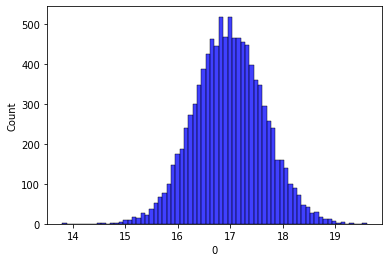

In [65]:
sns.histplot(data_sample_r[0] , color = 'blue')